In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as tsa
import statsmodels.api as sm

In [265]:
df_ob = pd.read_csv("round-1-island-data-bottle/prices_round_1_day_-2.csv", sep = ";")
df_ob = pd.concat([df_ob, pd.read_csv("round-1-island-data-bottle/prices_round_1_day_-1.csv", sep = ";")])
df_ob = pd.concat([df_ob, pd.read_csv("round-1-island-data-bottle/prices_round_1_day_0.csv", sep = ";")])
df_ob

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.0
1,-2,0,STARFRUIT,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.0
2,-2,100,AMETHYSTS,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,0.0
3,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,20,NaN,NaN,NaN,NaN,5002.0,0.0
4,-2,200,STARFRUIT,4997,1,4996.0,30.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,999700,STARFRUIT,5053,1,5048.0,26.0,NaN,NaN,5054,2,5055.0,24.0,NaN,NaN,5053.5,0.0
19996,0,999800,STARFRUIT,5047,27,NaN,NaN,NaN,NaN,5052,1,5054.0,27.0,NaN,NaN,5049.5,0.0
19997,0,999800,AMETHYSTS,9995,27,NaN,NaN,NaN,NaN,10005,27,NaN,NaN,NaN,NaN,10000.0,0.0
19998,0,999900,STARFRUIT,5048,2,5047.0,21.0,NaN,NaN,5054,23,NaN,NaN,NaN,NaN,5051.0,0.0


<Axes: >

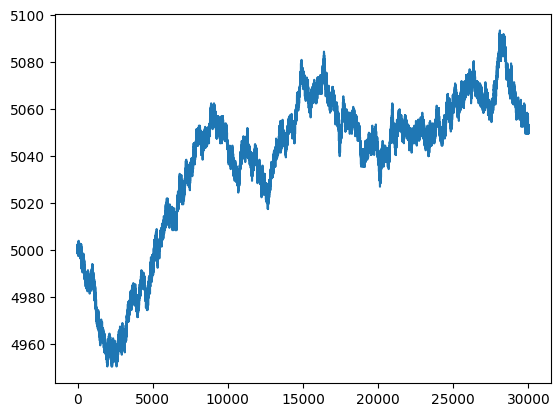

In [266]:
df_sf = df_ob[df_ob['product'] == 'STARFRUIT']['mid_price'].reset_index(drop=True)
df_sf.plot()

1.6949610240354882

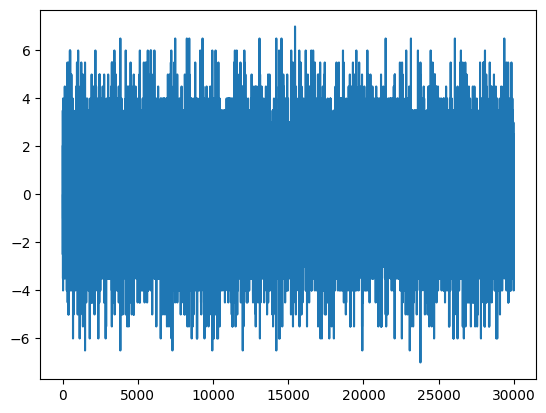

In [267]:
sf_diff = df_sf.diff()[1:].to_numpy()
plt.plot(sf_diff)
np.std(sf_diff)

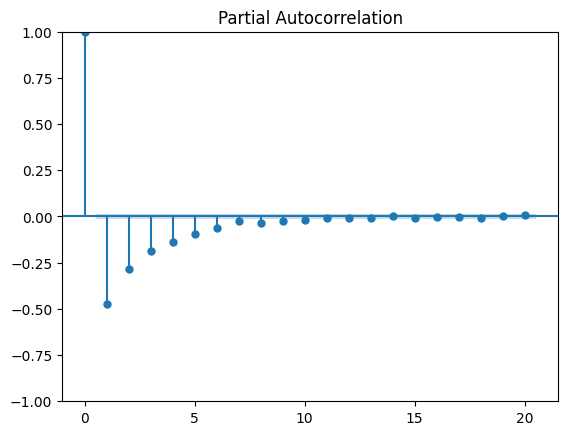

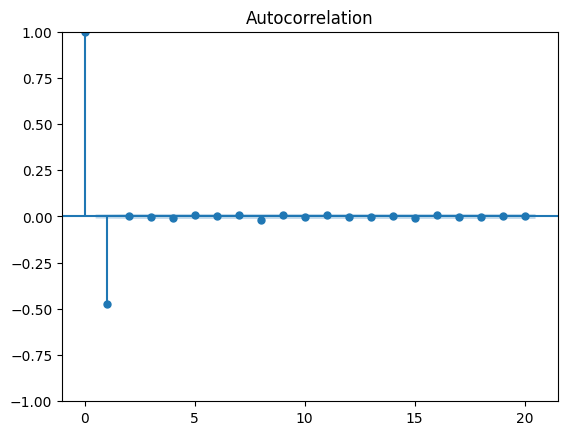

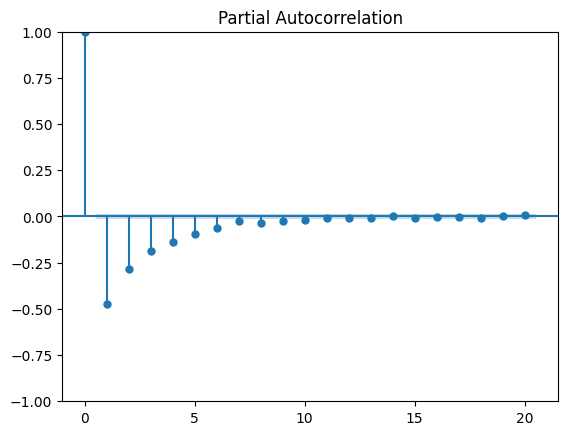

In [268]:
tsa.plot_acf(sf_diff, lags=20)
tsa.plot_pacf(sf_diff, lags=20)

Fitting AR(1) model

In [269]:
model = sm.tsa.ARIMA(sf_diff, order=(1, 0, 0))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                29999
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -54625.626
Date:                Thu, 11 Apr 2024   AIC                         109257.253
Time:                        00:45:39   BIC                         109282.179
Sample:                             0   HQIC                        109265.251
                              - 29999                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.006      0.283      0.778      -0.010       0.013
ar.L1         -0.4715      0.005   -104.283      0.000      -0.480      -0.463
sigma2         2.2343      0.016    141.642      0.000       2.203       2.265
===================================================================================
Ljung-Box (L1) (Q):                 532.40   Jarque-Bera (JB):               575.10
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.03
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

$$x_t = -0.47x_{t-1}$$

In [270]:
pred = result.forecast()
pred

array([-0.70473844])

In [288]:
sim_ar_sf_diff = np.zeros(29_999)
sim_ar_sf_diff[0] = sf_diff[0]
for i in range(1, len(sim_ar_sf_diff)):
    sim_ar_sf_diff[i] = (round((sf_diff[i - 1] * -0.4715) * 2) / 2)
sim_ar_sf_diff

array([ 2. , -1. ,  1. , ...,  0.5, -1. ,  2. ])

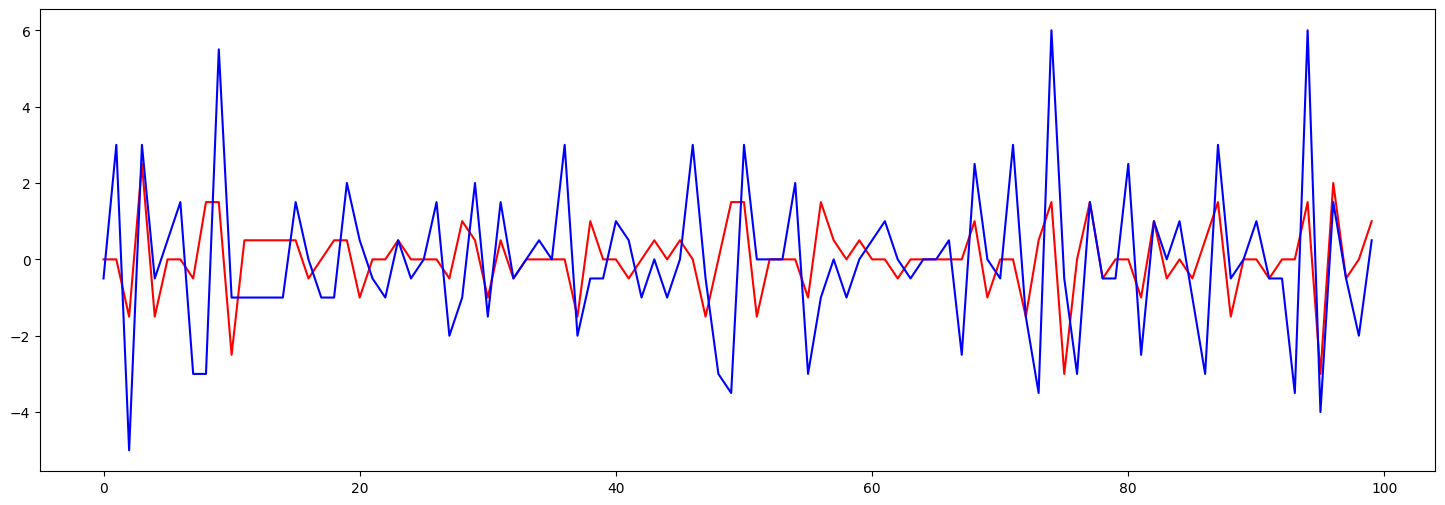

In [295]:
plt.figure(figsize=(18, 6))
plt.plot(sim_ar_sf_diff[400:500], color='red')
plt.plot(sf_diff[400:500], color='blue')
plt.show()

In [294]:
np.corrcoef(sim_ar_sf_diff, sf_diff)

array([[1.        , 0.46808557],
       [0.46808557, 1.        ]])

In [286]:
sf = df_sf.to_numpy()
sim_sf = np.zeros(len(sim_ar_sf_diff + 1))
sim_sf[0] = sf[0]
for i in range(1, len(sim_sf)):
    sim_sf[i] = sf[i - 1] + sim_ar_sf_diff[i - 1]
sim_sf

array([5000. , 5002. , 5001. , ..., 5052. , 5051.5, 5052.5])

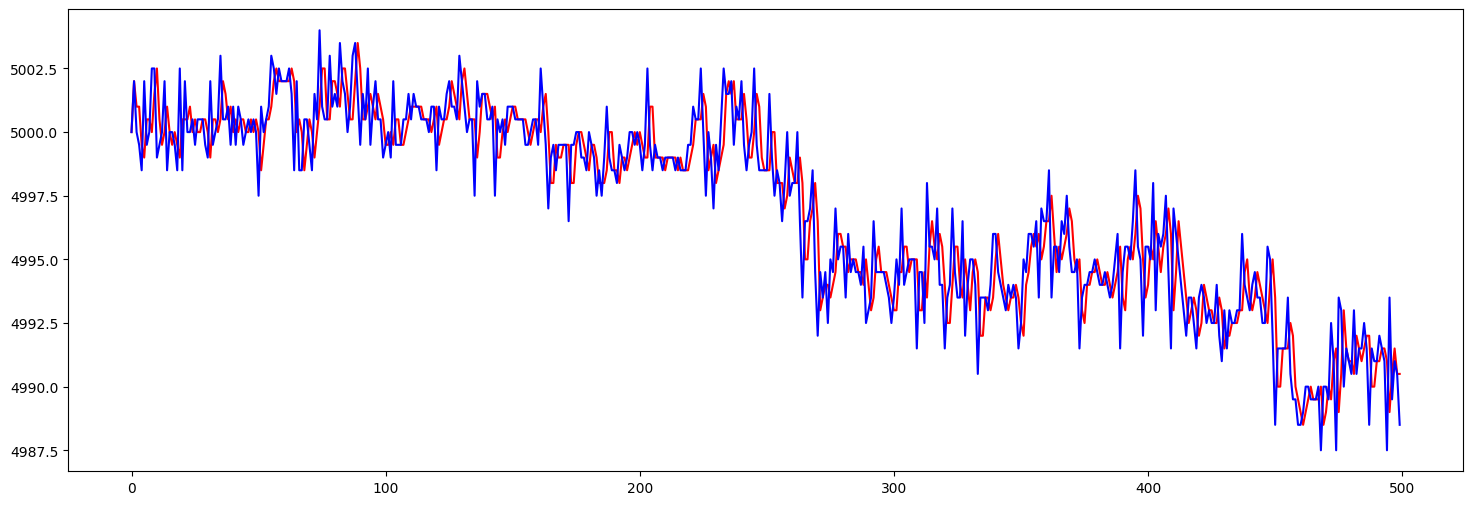

In [287]:
plt.figure(figsize=(18, 6))
plt.plot(sim_sf[:500], color='red')
plt.plot(sf[:500], color='blue')
plt.show()

Fitting ARMA(1, 1) model

In [275]:
model = sm.tsa.ARIMA(sf_diff, order=(0, 0, 2))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                29999
Model:                 ARIMA(0, 0, 2)   Log Likelihood              -52301.958
Date:                Thu, 11 Apr 2024   AIC                         104611.917
Time:                        00:45:44   BIC                         104645.152
Sample:                             0   HQIC                        104622.581
                              - 29999                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.002      0.728      0.467      -0.003       0.006
ma.L1         -0.7080      0.006   -127.855      0.000      -0.719      -0.697
ma.L2         -0.0009      0.006     -0.157      0.875      -0.012       0.010
sigma2         1.9136      0.013    146.410      0.000       1.888       1.939
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               929.04
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.03
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [280]:
sim_ma_sf_diff = np.zeros(29_999)
sim_ma_sf_diff[0] = sf_diff[0]
error = sim_ma_sf_diff[0] - sf_diff[0]
for i in range(1, len(sim_ma_sf_diff)):
    sim_ma_sf_diff[i] = int(round((error * -0.7096) * 2) / 2)
    error = sim_ma_sf_diff[i] - sf_diff[i]
sim_ma_sf_diff

array([ 2.,  0., -1., ..., -1.,  2., -4.])

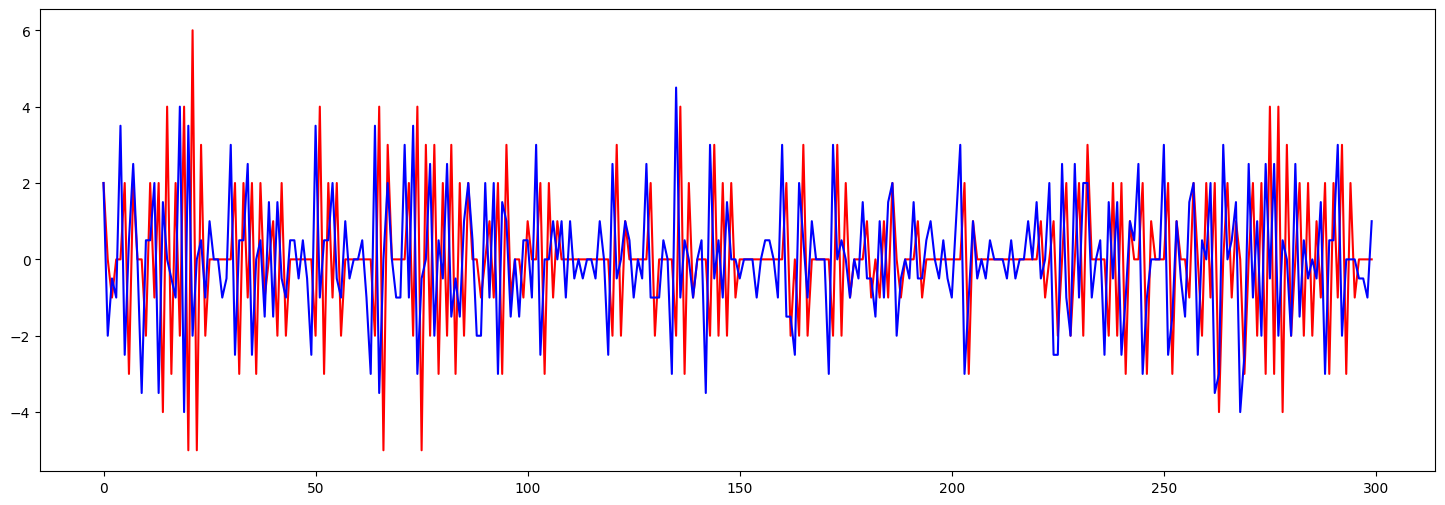

In [281]:
plt.figure(figsize=(18, 6))
plt.plot(sim_ma_sf_diff[:300], color='red')
plt.plot(sf_diff[:300], color='blue')
plt.show()

In [282]:
sf = df_sf.to_numpy()
sim_sf_ma = np.zeros(len(sim_ma_sf_diff + 1))
sim_sf_ma[0] = sf[0]
for i in range(1, len(sim_sf)):
    sim_sf_ma[i] = sf[i - 1] + sim_ma_sf_diff[i - 1]
sim_sf_ma

array([5000. , 5002. , 5002. , ..., 5052.5, 5050. , 5055.5])

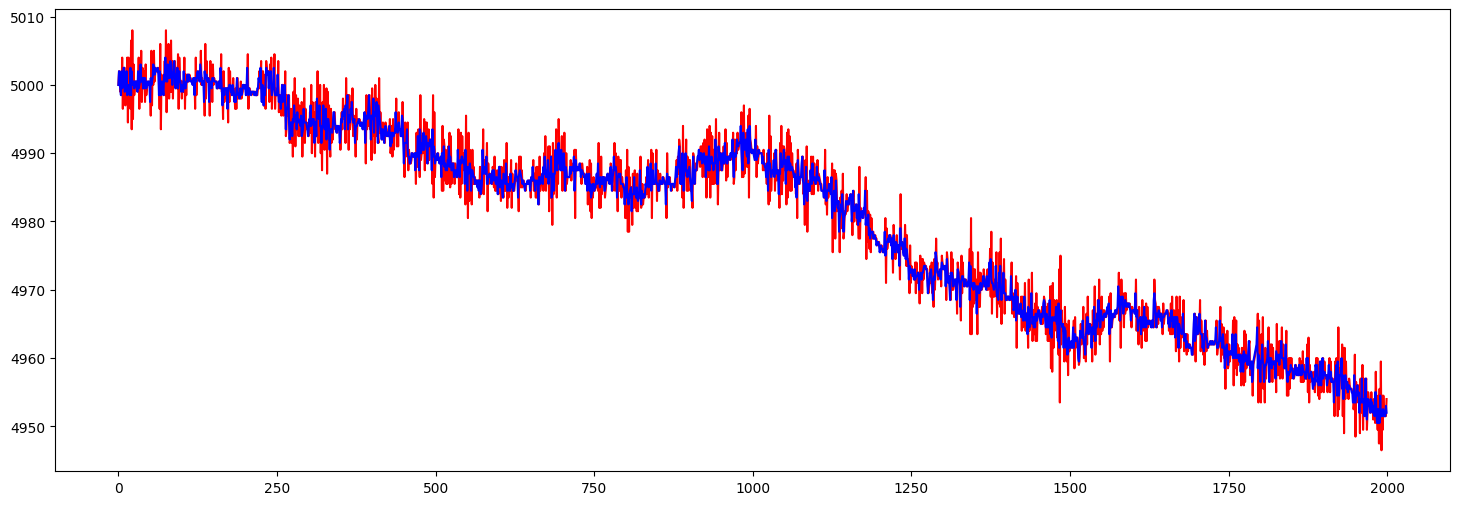

In [283]:
plt.figure(figsize=(18, 6))
plt.plot(sim_sf_ma[:2_000], color='red')
plt.plot(sf[:2_000], color='blue')
plt.show()